In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from Data_Filter_for_model_selection import getFinalData

In [2]:
#Get cleaned historic dataframe
crimes_pred_data = getFinalData()
crimes_pred_data.head()

,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Precinct,Time,Morning,Afternoon,Evening,Night
StartTime,,,,,,,,,,,,,
2014-03-30 20:40:00,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",ATTEMPTED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,20.0,False,False,True,False
2015-12-31 22:37:00,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,22.0,False,False,False,False
2015-12-31 19:45:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,44,19.0,False,False,True,False
2015-12-31 17:15:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,17.0,False,True,False,False
2015-12-31 14:50:00,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BRONX,INSIDE,OTHER,44,14.0,False,True,False,False


In [3]:
data_morn = crimes_pred_data.drop(['PD_DESC','PREM_TYP_DESC','Precinct','Time','Afternoon','Evening','Night'],axis=1)

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_morn['OFNS_DESC'] = labelencoder_X.fit_transform(data_morn['OFNS_DESC'])
data_morn['CRM_ATPT_CPTD_CD'] = labelencoder_X.fit_transform(data_morn['CRM_ATPT_CPTD_CD'])
data_morn['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_morn['LAW_CAT_CD'])
data_morn['BORO_NM'] = labelencoder_X.fit_transform(data_morn['BORO_NM'])
data_morn['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_morn['LOC_OF_OCCUR_DESC'])
data_morn['Morning'] = labelencoder_X.fit_transform(data_morn['Morning'])

# #Encoding the Dependent Variable
# labelencoder_y = LabelEncoder() 
# Y = labelencoder_y.fit_transform(Y)

In [5]:
data_morn.head()

,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,Morning
StartTime,,,,,,
2014-03-30 20:40:00,2,0,0,0,1,0
2015-12-31 22:37:00,1,1,1,0,1,0
2015-12-31 19:45:00,0,1,1,0,1,0
2015-12-31 17:15:00,0,1,1,0,1,0
2015-12-31 14:50:00,3,1,2,0,1,0


In [7]:
X = data_morn.iloc[:, 0:5].values
Y = data_morn.iloc[:, 5].values

In [8]:
X[:,0:5]

array([[2, 0, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1],
       ...,
       [4, 1, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 0, 1]], dtype=int64)

In [9]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
X.shape

(82524, 5)

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [17]:
explained_variance

array([0.32319836, 0.25084002])

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [19]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [20]:
#Get Accuracy Score

from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test,Y_pred))

0.8622841563162678


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [22]:
cm

array([[14232,     0],
       [ 2273,     0]], dtype=int64)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

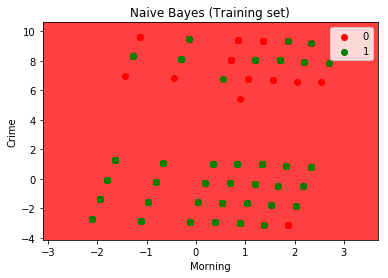

In [24]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Morning')
plt.ylabel('Crime')
plt.legend()
plt.show()

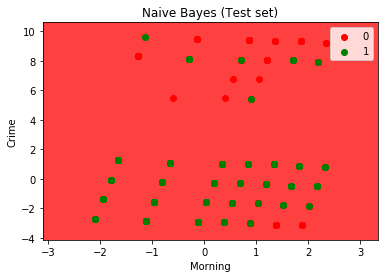

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Morning')
plt.ylabel('Crime')
plt.legend()
plt.show()